In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [148]:
train = pd.read_csv('train.csv', engine='python')
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [149]:
test = pd.read_csv('test.csv', engine='python')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


k: 2, inertia : 141731596052.6865
k: 3, inertia : 93263968980.8303
k: 4, inertia : 67366933376.6103
k: 5, inertia : 56459648679.0319
k: 6, inertia : 47063655777.2855
k: 7, inertia : 40041384909.0536
k: 8, inertia : 32744351078.3215
k: 9, inertia : 27965201748.6183
k: 10, inertia : 24313672662.1185


Text(0, 0.5, 'inertia')

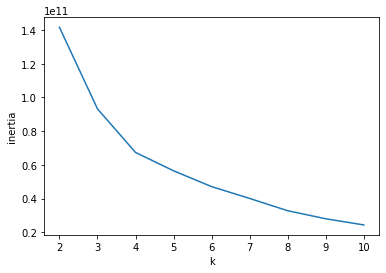

In [150]:
#적정 군집수 파악
cl_train = train['전력사용량(kWh)'].values.reshape(60, -1)
inertia_arr = []
k_arr = range(2, 11)

for k in k_arr:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cl_train)
    interia = kmeans.inertia_
    
    print('k: {0}, inertia : {1:.4f}'.format(k, interia))
    inertia_arr.append(interia)

plt.plot(k_arr, inertia_arr)
plt.xlabel('k')
plt.ylabel('inertia')

In [151]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(cl_train)
km_pred = km.predict(cl_train)

In [152]:
clusters = pd.DataFrame(km_pred)
clusters['num'] = train['num'].unique()
clusters

,0,num
0,1,1
1,2,2
2,0,3
3,2,4
4,0,5
5,2,6
6,2,7
7,3,8
8,2,9
9,2,10


In [153]:
train = train.merge(clusters, on='num')
train = train.rename(columns={0:'ass'})
test = test.merge(clusters, on='num')
test = test.rename(columns={0:'ass'})

In [154]:
ice = pd.DataFrame(train['비전기냉방설비운영'])
ice['num'] = train['num']
ice =ice.drop_duplicates()

hot = pd.DataFrame(train['태양광보유'])
hot['num'] = train['num']
hot = hot.drop_duplicates()

In [155]:
test = test.drop(['비전기냉방설비운영', '태양광보유'], axis=1)
test = test.merge(ice, on='num')
test = test.merge(hot, on='num')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",ass,비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,1,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,1,0.0,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0


In [156]:
test = test.interpolate(method='values')

In [157]:
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

In [158]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['month'] = train['date_time'].dt.month
train['weekday'] = train['date_time'].dt.weekday
test['date_time'] = pd.to_datetime(test['date_time'])
test['month'] = test['date_time'].dt.month
test['weekday'] = test['date_time'].dt.weekday

In [159]:
def holiday(x):
    if str(x.date()) == '2020-06-06':
        return 1
    elif str(x.date()) == '2020-08-15':
        return 1
    elif x.weekday() == 5 or x.weekday() == 6:
        return 1
    else: 
        return 0

train['holiday'] = train['date_time'].apply(lambda x: holiday(x))
test['holiday'] = test['date_time'].apply(lambda x: holiday(x))

In [160]:
train2 = train.drop(['date_time', '전력사용량(kWh)'], axis=1)
test2 = test.drop(['date_time'], axis=1)

In [161]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.1, n_estimators=1000, colsample_bytree=0.5, subsample=0.7, max_depth=5)

In [162]:
from lightgbm import LGBMRegressor
li = LGBMRegressor(n_estimators=10000, random_state=0)

In [163]:
train2

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,ass,time,month,weekday,holiday
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1,0,6,0,0
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,1,6,0,0
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1,2,6,0,0
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1,3,6,0,0
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1,4,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,19,8,0,0
122396,60,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,20,8,0,0
122397,60,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,21,8,0,0
122398,60,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,22,8,0,0


In [168]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
i = 0
result = 0
best_score = 0
for train_idx, test_idx in kf.split(train2, train['전력사용량(kWh)']):
    x_train, x_val = train2.iloc[train_idx], train2.iloc[test_idx]
    y_train, y_val = train['전력사용량(kWh)'][train_idx], train['전력사용량(kWh)'][test_idx]
    li.fit(x_train, y_train, eval_set=[(x_val, y_val)], verbose=50, early_stopping_rounds=25)
    result += li.predict(test2)
    i += 1
    print(f'----------------------------------------n_fold:{i}----------------------------------------')

Training until validation scores don't improve for 25 rounds
[50]	valid_0's l2: 137744
[100]	valid_0's l2: 89141.2
[150]	valid_0's l2: 74148.9
[200]	valid_0's l2: 65055.7
[250]	valid_0's l2: 60337.3
[300]	valid_0's l2: 56201
[350]	valid_0's l2: 53015.7
[400]	valid_0's l2: 50979.6
[450]	valid_0's l2: 49332.3
[500]	valid_0's l2: 47796.7
[550]	valid_0's l2: 46594.5
[600]	valid_0's l2: 45623.8
[650]	valid_0's l2: 45205.5
[700]	valid_0's l2: 44477.2
[750]	valid_0's l2: 43849.9
[800]	valid_0's l2: 43178.4
[850]	valid_0's l2: 42782.5
[900]	valid_0's l2: 42402
[950]	valid_0's l2: 41797.8
[1000]	valid_0's l2: 41452
[1050]	valid_0's l2: 41040.9
[1100]	valid_0's l2: 40723.2
[1150]	valid_0's l2: 40455.1
[1200]	valid_0's l2: 40055.3
[1250]	valid_0's l2: 39836.6
[1300]	valid_0's l2: 39576
[1350]	valid_0's l2: 39347.4
[1400]	valid_0's l2: 39159.3
[1450]	valid_0's l2: 38999.4
[1500]	valid_0's l2: 38831.7
[1550]	valid_0's l2: 38748
[1600]	valid_0's l2: 38603
[1650]	valid_0's l2: 38499.2
[1700]	valid_0'

In [165]:
result

array([3604.55184193, 3617.80660539, 3593.20753617, ..., 7199.84573789,
       7116.45542976, 6855.40279578])

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0
